# VGG Architecture

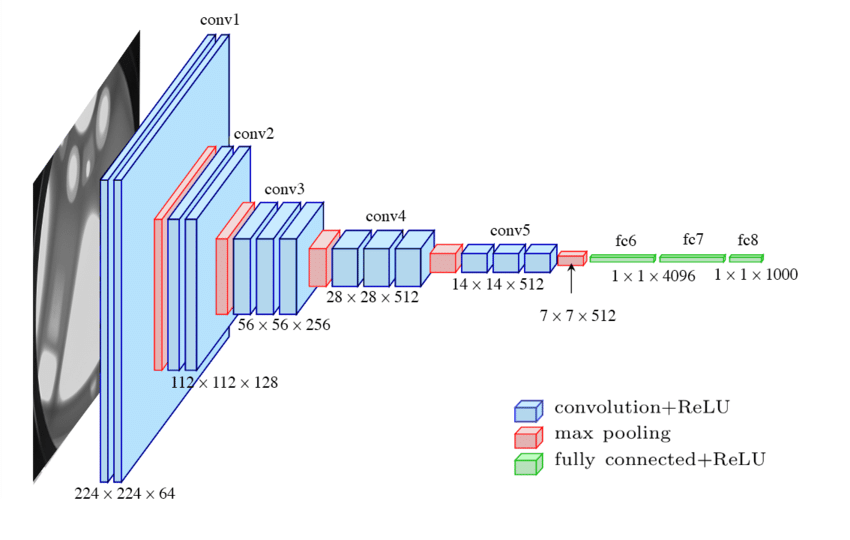

### What do layers learn
- Early Layers are able to detect simple features, like corners, edges and simple textures.
- Intermediate Layers are able to detect more abstract patterns, like contours, shapes and textures.
- Deeper Layers represent high level semantic features, responding selectively to object categories or significant parts.

### Testing the Architecture

Subset dataset will be Food101 Dataset.

4 different classes:
1. Sushi
2. Cup-Cakes
3. Macarons
4. Chocolate Cake

In [1]:
import torch
from torch import nn

In [2]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'food_images'

if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    print(f"{image_path} does not exist")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"food_images.zip", 'wb') as f:
    request = requests.get("https://programmingoceanacademy.s3.ap-southeast-1.amazonaws.com/image_classification_dataset.zip")
    print('Downloading images...')
    f.write(request.content)

with zipfile.ZipFile(data_path / "food_images.zip", 'r') as zip_ref:
    print("Unzipping food images...")
    zip_ref.extractall(image_path)

data/food_images already exists
Unzipping food images...


In [4]:
import os

os.remove("/Users/user/code/vh-learning-playground/data/food_images.zip")

In [5]:
train_dir = image_path / "dataset/train"
test_dir = image_path / "dataset/test"

In [6]:
train_dir, test_dir

(PosixPath('data/food_images/dataset/train'),
 PosixPath('data/food_images/dataset/test'))

In [12]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)

There are 1 directories and 0 images in data/food_images
There are 2 directories and 0 images in data/food_images/dataset
There are 4 directories and 0 images in data/food_images/dataset/test
There are 0 directories and 75 images in data/food_images/dataset/test/cup_cakes
There are 0 directories and 75 images in data/food_images/dataset/test/macarons
There are 0 directories and 75 images in data/food_images/dataset/test/sushi
There are 0 directories and 75 images in data/food_images/dataset/test/chocolate_cake
There are 4 directories and 0 images in data/food_images/dataset/train
There are 0 directories and 250 images in data/food_images/dataset/train/cup_cakes
There are 0 directories and 250 images in data/food_images/dataset/train/macarons
There are 0 directories and 250 images in data/food_images/dataset/train/sushi
There are 0 directories and 250 images in data/food_images/dataset/train/chocolate_cake


In [14]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*/*.jpg"))
image_path_list

[PosixPath('data/food_images/dataset/test/cup_cakes/1134258.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/778852.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2772881.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1030942.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3670749.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/773092.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2671408.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1406143.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1998862.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/1794466.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/360142.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/13821.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/2475758.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3347698.jpg'),
 PosixPath('data/food_images/dataset/test/cup_cakes/3338879.jpg'),


Random image path data/food_images/dataset/test/sushi/282233.jpg
Image class sushi
Image height 384
Image width 512


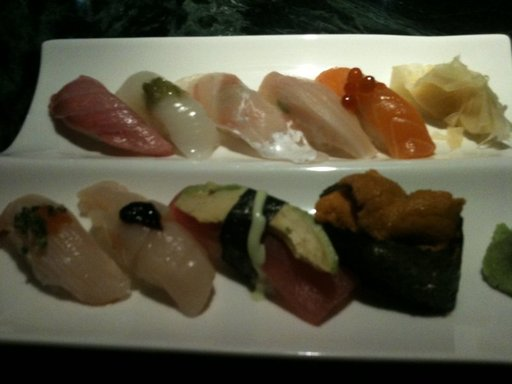

In [16]:
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
print(f"Random image path {random_image_path}")
print(f"Image class {image_class}")
print(f"Image height {img.height}")
print(f"Image width {img.width}")
img

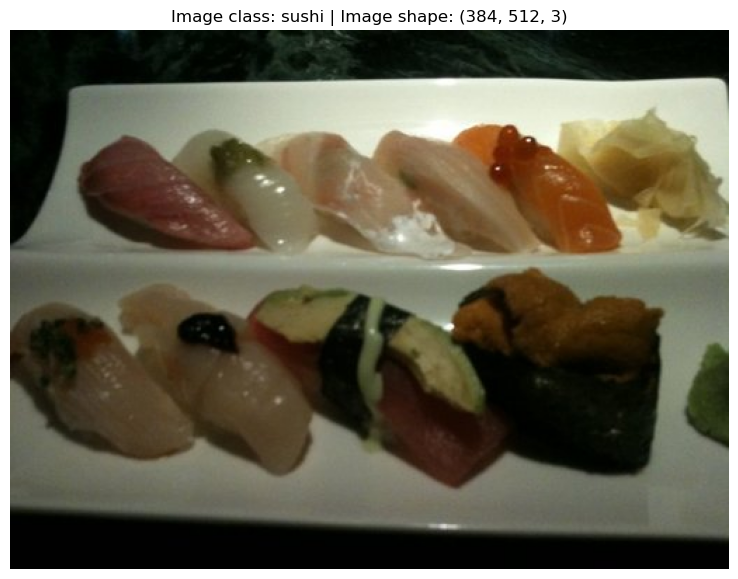

In [19]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis("off")
plt.show()